In [1]:
import pandas as pd
import numpy as np


pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter('ignore')


In [2]:
df=pd.read_csv('attacks.csv', encoding='latin1')

df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
dim_original=df.shape  # variable shape original

df.shape  

(25723, 24)

In [4]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
nuevas_cols=[c.lower() for c in df.columns]    # Renombrar las columnas MINUSCULAS
df=df.rename(columns={k:v for k,v in zip(df.columns, nuevas_cols)}) 

In [6]:
new_cols=[c.strip() for c in df.columns]
df=df.rename(columns={k:v for k,v in zip(df.columns, new_cols)}) # Eliminar espacios columnas



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal (y/n)             5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null 

In [8]:
nan_cols = df.isna().sum()  #definir una variable de columnas Nan

In [9]:
nan_cols[nan_cols>0]

case number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex                       19986
age                       22252
injury                    19449
fatal (y/n)               19960
time                      22775
species                   22259
investigator or source    19438
pdf                       19421
href formula              19422
href                      19421
case number.1             19421
case number.2             19421
original order            19414
unnamed: 22               25722
unnamed: 23               25721
dtype: int64

In [10]:
nan_cols[nan_cols>1e4].index # En una limpieza de datos normal, identificaria el número de columnas Nan para así eliminarlas. 

Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal (y/n)', 'time',
       'species', 'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'original order', 'unnamed: 22',
       'unnamed: 23'],
      dtype='object')

In [11]:
df.duplicated().sum()  

19411

In [12]:
df=df.drop_duplicates() #Eliminar duplicados

In [13]:
dim_original,df.shape #Observar cuantas filas hemos eliminado

((25723, 24), (6312, 24))

In [14]:
df.head()

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [18]:
df2 = df.dropna (how='all')        #Eliminar filas que contengan Nan 

In [19]:
df2  #observamos que aún quedan filas con Nan

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN,NaN
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df2= df2.dropna(thresh = 3) # Eliminar filas nulas restantes que contengan al menos 3 nulos**

In [21]:
df2.year=df2.year.fillna(0) # Rellenar filas nulas de columna year por 0, para homogeneizar el tipo de dato

In [22]:
df2.year = df2.year.astype(dtype='int64') #cambiar el tipo de dato de la columna a enteros

In [23]:
df2

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [26]:
df2.sex.value_counts()

M      5094
F       637
N         2
M         2
lli       1
.         1
Name: sex, dtype: int64

In [27]:
df2['sex'] = df2['sex'].str.replace('N', 'M')         #para la columna sex, queremos hacer limpieza de datos y renombrar valores que no concuerdan 
df2['sex'] = df2['sex'].str.strip()                       #eliminamos espacios de las filas
df2['sex'] = df2['sex'].fillna('Unknown') 
df2['sex'] = df2['sex'].str.replace('lli', 'Unknown')
df2['sex'] = df2['sex'].str.replace('.', 'Unknown')
set(df2['sex'])
df2['sex'].value_counts(dropna=True)

M          5098
F           637
Unknown     567
Name: sex, dtype: int64

In [31]:
df2.time.value_counts()

Afternoon      187
11h00          128
Morning        121
12h00          109
15h00          108
              ... 
08h35            1
10h45-11h15      1
17h00-18h00      1
14h37            1
11h56            1
Name: time, Length: 366, dtype: int64

In [32]:
df2['time'] = df2['time'].str.replace('11h00', 'Morning')

In [33]:
df2.time.value_counts()

Morning                    249
Afternoon                  187
12h00                      109
15h00                      108
16h00                      101
                          ... 
Between 05h00 and 08h00      1
08h40                        1
08h35                        1
10h45-11h15                  1
11h56                        1
Name: time, Length: 365, dtype: int64

In [34]:
df2['fatal (y/n)'].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
y             1
N             1
2017          1
M             1
Name: fatal (y/n), dtype: int64

In [35]:
df2['fatal (y/n)'] = df2['fatal (y/n)'].str.replace('2017', 'UNKNOWN')      # Cambiar todos los valores para homogeneizar la colunna FATAL YN
df2['fatal (y/n)'] = df2['fatal (y/n)'].str.strip()
df2['fatal (y/n)'] = df2['fatal (y/n)'].fillna('UNKNOWN')
df2['fatal (y/n)'] = df2['fatal (y/n)'].str.replace('y', 'Y')
df2['fatal (y/n)'] = df2['fatal (y/n)'].str.replace('M', 'UNKNOWN')

set(df2['fatal (y/n)'])
df2['fatal (y/n)'].value_counts(dropna=True)

N          4301
Y          1389
UNKNOWN     612
Name: fatal (y/n), dtype: int64

In [36]:
df2.head()

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [37]:
df2['original order'] = df2['original order'].astype(dtype='int64')

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   case number             6301 non-null   object
 1   date                    6302 non-null   object
 2   year                    6302 non-null   int64 
 3   type                    6298 non-null   object
 4   country                 6252 non-null   object
 5   area                    5847 non-null   object
 6   location                5762 non-null   object
 7   activity                5758 non-null   object
 8   name                    6092 non-null   object
 9   sex                     6302 non-null   object
 10  age                     3471 non-null   object
 11  injury                  6274 non-null   object
 12  fatal (y/n)             6302 non-null   object
 13  time                    2948 non-null   object
 14  species                 3464 non-null   object
 15  inve

In [39]:
df2.head()

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN


In [40]:
set(df.age) #vemos todos los valores únicos de las filas de la columna age

{' ',
 '  ',
 ' 28',
 ' 30',
 ' 43',
 '"middle-age"',
 '"young"',
 '(adult)',
 '1',
 '10',
 '10 or 12',
 '11',
 '12',
 '12 or 13',
 '13',
 '13 or 14',
 '13 or 18',
 '14',
 '15',
 '16',
 '16 to 18',
 '17',
 '17 & 16',
 '17 & 35',
 '18',
 '18 months',
 '18 or 20',
 '18 to 22',
 '19',
 '2 to 3 months',
 '20',
 '20 ',
 '20?',
 '20s',
 '21',
 '21 & ?',
 '21 or 26',
 '21, 34,24 & 35',
 '22',
 '23',
 '23 & 20',
 '23 & 26',
 '24',
 '25',
 '25 or 28',
 '25 to 35',
 '26',
 '27',
 '28',
 '28 & 26',
 '28, 23 & 30',
 '29',
 '2½',
 '3',
 '30',
 '30 & 32',
 '30 or 36',
 '30s',
 '31',
 '31 or 33',
 '32',
 '32 & 30',
 '33',
 '33 & 26',
 '33 & 37',
 '33 or 37',
 '34',
 '34 & 19',
 '35',
 '36',
 '36 & 23',
 '36 & 26',
 '37',
 '37, 67, 35, 27,  ? & 27',
 '38',
 '39',
 '40',
 '40s',
 '41',
 '42',
 '43',
 '44',
 '45',
 '45 ',
 '46',
 '46 & 34',
 '47',
 '48',
 '49',
 '5',
 '50',
 '50 & 30',
 '50s',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 "60's",
 '60s',
 '61',
 '62',
 '63

In [41]:
df2.shape

(6302, 24)

In [42]:
import re

In [43]:
df2.age = df['age'].fillna('0')
df2.age

0       57
1       11
2       48
3        0
4        0
        ..
6297     0
6298     0
6299     0
6300     0
6301    15
Name: age, Length: 6302, dtype: object

In [44]:
lst= []

patron = '\d+'
for e in df2.age:
    try:
        lst.append(re.findall(patron,e)[0])
    except:
        lst.append('Unknown')
        

In [45]:
df2.age=lst

In [46]:
df2.age.value_counts()

0     2831
17     156
18     153
20     151
19     143
      ... 
67       1
86       1
82       1
87       1
84       1
Name: age, Length: 83, dtype: int64

In [47]:
df2.head()

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN


In [48]:
df2.injury.value_counts()

FATAL                                                                                    802
Survived                                                                                  97
Foot bitten                                                                               87
No injury                                                                                 82
Leg bitten                                                                                72
                                                                                        ... 
Shark leapt into boat, hitting Fanie Schoeman on his back before sliding into the sea      1
No injury to occupants. shark bit oar                                                      1
FATAL, disappeared, thought to have been taken by a shark                                  1
Shark jumped in boat, hitting her in the face & knocking her unconscious                   1
Injury to posterior right leg                                         

In [49]:
df2.shape

(6302, 24)

In [50]:
df2.injury = df.injury.fillna('Unknown')

In [51]:
df.injury.value_counts()

FATAL                                                                                    802
Survived                                                                                  97
Foot bitten                                                                               87
No injury                                                                                 82
Leg bitten                                                                                72
                                                                                        ... 
Shark leapt into boat, hitting Fanie Schoeman on his back before sliding into the sea      1
No injury to occupants. shark bit oar                                                      1
FATAL, disappeared, thought to have been taken by a shark                                  1
Shark jumped in boat, hitting her in the face & knocking her unconscious                   1
Injury to posterior right leg                                         

In [52]:
set(df2)

{'activity',
 'age',
 'area',
 'case number',
 'case number.1',
 'case number.2',
 'country',
 'date',
 'fatal (y/n)',
 'href',
 'href formula',
 'injury',
 'investigator or source',
 'location',
 'name',
 'original order',
 'pdf',
 'sex',
 'species',
 'time',
 'type',
 'unnamed: 22',
 'unnamed: 23',
 'year'}

In [53]:
df2.injury[df2.injury.str.contains("Fatal")] = 'FATAL'      #definir unas variables para la columna injury 
df2.injury[df2.injury.str.contains("FATAL")] = 'FATAL'
df2.injury[df2.injury.str.contains("fatal")] = 'FATAL'
df2.injury[df2.injury.str.contains("died")] = 'FATAL'
df2.injury[df2.injury.str.contains("Died")] = 'FATAL'
df2.injury[df2.injury.str.contains("FATAL")] = 'FATAL'
df2.injury[df2.injury.str.contains("Survived")] = 'Survived'
df2.injury[df2.injury.str.contains("survived")] = 'Survived'
df2.injury[df2.injury.str.contains("neck")] = 'Hardcore Injury'
df2.injury[df2.injury.str.contains("necks")] = 'Hardcore Injury'
df2.injury[df2.injury.str.contains("Head")] = 'Hardcore Injury'
df2.injury[df2.injury.str.contains("head")] = 'Hardcore Injury'
df2.injury[df2.injury.str.contains("lacerated")] = 'Hardcore Injury'
df2.injury[df2.injury.str.contains("lacerations")] = 'Hardcore Injury'
df2.injury[df2.injury.str.contains("Lacerations")] = 'Hardcore Injury'
df2.injury[df2.injury.str.contains("Multiple")] = 'Hardcore Injury'
df2.injury[df2.injury.str.contains("multiple")] = 'Hardcore Injury'
df2.injury[df2.injury.str.contains("multiples")] = 'Hardcore Injury'
df2.injury[df2.injury.str.contains("Multiples")] = 'Hardcore Injury'
df2.injury[df2.injury.str.contains("Laceration")] = 'Hardcore Injury'
df2.injury[df2.injury.str.contains("laceration")] = 'Hardcore Injury'
df2.injury[df2.injury.str.contains("Major")] = 'Hardcore Injury'
df2.injury[df2.injury.str.contains("major")] = 'Hardcore Injury'
df2.injury[df2.injury.str.contains("Seriuos")] = 'Hardcore Injury'
df2.injury[df2.injury.str.contains("Serious injuries")] = 'Hardcore Injury'
df2.injury[df2.injury.str.contains("No injury")] = 'No injury'
df2.injury[df2.injury.str.contains("no injury")] = 'No injury'
df2.injury[df2.injury.str.contains("No Injury")] = 'No injury'
df2.injury[df2.injury.str.contains("No")] = 'No injury'
df2.injury[df2.injury.str.contains("no")] = 'No injury'
df2.injury[df2.injury.str.contains("Survived")] = 'No injury'
df2.injury[df2.injury.str.contains("survived")] = 'No injury'
df2.injury[df2.injury.str.contains("survivor")] = 'No injury'
df2.injury[df2.injury.str.contains("Leg")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("leg")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("ankle")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("Ankle")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("femur")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("tibia")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("heel")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("knee")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("Torso")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("torso")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("Back")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("back")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("Abdomen")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("Abrasion")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("abrasion")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("Abrasions")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("abrasion")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("Chest")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("chest")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("cheek")] = 'Medium Injury'
df2.injury[df2.injury.str.contains("hand")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Hand")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Hands")] = 'Low Injury'
df2.injury[df2.injury.str.contains("hands")] = 'Low Injury'
df2.injury[df2.injury.str.contains("finger")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Finger")] = 'Low Injury'
df2.injury[df2.injury.str.contains("wounds")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Foot")] = 'Low Injury'
df2.injury[df2.injury.str.contains("foot")] = 'Low Injury'
df2.injury[df2.injury.str.contains("arm")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Arm")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Thigh")] = 'Low Injury'
df2.injury[df2.injury.str.contains("thigh")] = 'Low Injury'
df2.injury[df2.injury.str.contains("thighs")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Minor")] = 'Low Injury'
df2.injury[df2.injury.str.contains("minor")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Punctures")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Puncture")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Left")] = 'Low Injury'
df2.injury[df2.injury.str.contains("left")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Shoulder")] = 'Low Injury'
df2.injury[df2.injury.str.contains("shoulder")] = 'Low Injury'
df2.injury[df2.injury.str.contains("bite")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Bite")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Knee")] = 'Low Injury'
df2.injury[df2.injury.str.contains("knee")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Heel")] = 'Low Injury'
df2.injury[df2.injury.str.contains("heel")] = 'Low Injury'
df2.injury[df2.injury.str.contains("toe")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Toe")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Right")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Left")] = 'Low Injury'
df2.injury[df2.injury.str.contains("right")] = 'Low Injury'
df2.injury[df2.injury.str.contains("left")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Shin")] = 'Low Injury'
df2.injury[df2.injury.str.contains("shin")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Bruise")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Calf")] = 'Low Injury'
df2.injury[df2.injury.str.contains("Bitten")] = 'Low Injury'
df2.injury[df2.injury.str.contains("bitten")] = 'Low Injury'
df2.injury[df2.injury.str.contains("bruised")] = 'Low Injury'
df2.injury[df2.injury.str.contains("shark")] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains("Shark")] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains("sharks")] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains("sharks")] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains("drowning")] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains("details")] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains("re")] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains("Re")] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains("Boat")] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains("PROVOKED")] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('Shark attack not defined')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('Missing')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('Human')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('Never')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('Jumped')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('Extensive')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('Board')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('Feet')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('Mauled')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('Doubtful')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('Small bruise to calf ')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('General')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('Suit ripped    ')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('on board')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('Found to be a hoax ')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('One man')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('perished')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('Toothmarks')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('Several broken ribs')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('posterior')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('been downing')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('be fiction')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('Found to be a hoax')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('Suit ripped')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains('Small bruise to calf')] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains("Serious")] = 'Shark attack not defined'
df2.injury[df2.injury.str.contains("Shark attack not defined")] = 'Shark attack not defined'





In [54]:
df2.injury.value_counts()

Shark attack not defined    1655
FATAL                       1373
No injury                   1335
Low Injury                  1222
Medium Injury                717
Name: injury, dtype: int64

In [55]:
set(df2.injury)

{'FATAL',
 'Low Injury',
 'Medium Injury',
 'No injury',
 'Shark attack not defined'}

In [56]:
df2.shape, dim_original

((6302, 24), (25723, 24))

In [57]:
df2.time=df2.time.fillna('Unknown')   

In [58]:
df2.time[df2.time.str.contains("00h")] = 'Night'
df2.time[df2.time.str.contains("01h")] = 'Night'
df2.time[df2.time.str.contains("02h")] = 'Night'
df2.time[df2.time.str.contains("03h")] = 'Night'
df2.time[df2.time.str.contains("04h")] = 'Night'
df2.time[df2.time.str.contains("05h")] = 'Night'
df2.time[df2.time.str.contains("06h")] = 'Night'
df2.time[df2.time.str.contains("07h")] = 'Morning'
df2.time[df2.time.str.contains("08h")] = 'Morning'
df2.time[df2.time.str.contains("09h")] = 'Morning'
df2.time[df2.time.str.contains("10h")] = 'Morning'
df2.time[df2.time.str.contains("11h")] = 'Morning'
df2.time[df2.time.str.contains("12h")] = 'Morning'
df2.time[df2.time.str.contains("13h")] = 'Morning'
df2.time[df2.time.str.contains("14h")] = 'Afternoon'
df2.time[df2.time.str.contains("15h")] = 'Afternoon'
df2.time[df2.time.str.contains("16h")] = 'Afternoon'
df2.time[df2.time.str.contains("17h")] = 'Afternoon'
df2.time[df2.time.str.contains("18h")] = 'Afternoon'
df2.time[df2.time.str.contains("19h")] = 'Afternoon'
df2.time[df2.time.str.contains("20h")] = 'Afternoon'
df2.time[df2.time.str.contains("21h")] = 'Afternoon'
df2.time[df2.time.str.contains("22h")] = 'Afternoon'
df2.time[df2.time.str.contains("23h")] = 'Afternoon'
df2.time[df2.time.str.contains("Evening")] = 'Night'
df2.time[df2.time.str.contains("dawn")] = 'Night'
df2.time[df2.time.str.contains("morning")] = 'Morning'
df2.time[df2.time.str.contains("afternoon")] = 'Afternoon'
df2.time[df2.time.str.contains("dawn")] = 'Night'
df2.time[df2.time.str.contains("lunchtime")] = 'Afternoon'
df2.time[df2.time.str.contains("afternoon")] = 'Afternoon'
df2.time[df2.time.str.contains("Night")] = 'Night'
df2.time[df2.time.str.contains("Mid")] = 'Afternoon'
df2.time[df2.time.str.contains("noon")] = 'Afternoon'
df2.time[df2.time.str.contains("Midday")] = 'Morning'
df2.time[df2.time.str.contains("Midnight")] = 'Night'
df2.time[df2.time.str.contains("Morning")] = 'Morning'
df2.time[df2.time.str.contains("Possibly")] = 'Morning'
df2.time[df2.time.str.contains("Noon")] = 'Morning'
df2.time[df2.time.str.contains("P")] = 'Morning'
df2.time[df2.time.str.contains("dusk")] = 'Night'
df2.time[df2.time.str.contains("night")] = 'Night'
df2.time[df2.time.str.contains("\xa0")] = 'Night'
df2.time[df2.time.str.contains("Sunset")] = 'Night'
df2.time[df2.time.str.contains(' ')] = 'Unknown'
df2.time[df2.time.str.contains('  ')] = 'Unknown'
df2.time[df2.time.str.contains('   ')] = 'Unknown'
df2.time[df2.time.str.contains('After dark')] = 'Night'
df2.time[df2.time.str.contains('After lunch')] = 'Afternoon'
df2.time[df2.time.str.contains('Early evening')] = 'Afternoon'
df2.time[df2.time.str.contains('Evening')] = 'Evening'
df2.time[df2.time.str.contains('Night')] = 'Night'
df2.time[df2.time.str.contains('shortly before dusk')] = 'Evening'
df2.time[df2.time.str.contains('--')] = 'Unknown'
df2.time[df2.time.str.contains('0500')] = 'Night'
df2.time[df2.time.str.contains('06j00')] = 'Night'
df2.time[df2.time.str.contains('0830')] = 'Morning'
df2.time[df2.time.str.contains('1300')] = 'Night'
df2.time[df2.time.str.contains('1500')] = 'Afternoon'
df2.time[df2.time.str.contains('15j45')] = 'Afternoon'
df2.time[df2.time.str.contains('1600')] = 'Afternoon'
df2.time[df2.time.str.contains('2 hours after Opperman')] = 'Afternoon'
df2.time[df2.time.str.contains('2 hrs before sunset')] = 'Night'
df2.time[df2.time.str.contains('30 minutes after 1992.07.08.a')] = 'Afternoon'
df2.time[df2.time.str.contains('8:04 pm')] = 'Afternoon'
df2.time[df2.time.str.contains('9h00')] = 'Morning'
df2.time[df2.time.str.contains('A.M.')] = 'Morning'
df2.time[df2.time.str.contains('AM')] = 'Morning'
df2.time[df2.time.str.contains('After Dusk')] = 'Night'
df2.time[df2.time.str.contains('After dusk')] = 'Night'
df2.time[df2.time.str.contains('After midnight')] = 'Afternoon'
df2.time[df2.time.str.contains('After noon')] = 'Afternoon'
df2.time[df2.time.str.contains('Afternoon')] = 'Afternoon'
df2.time[df2.time.str.contains('Before daybreak')] = 'Afternoon'
df2.time[df2.time.str.contains('Dark')] = 'Night'
df2.time[df2.time.str.contains('Dawn')] = 'Morning'
df2.time[df2.time.str.contains('Daybreak')] = 'Afternoon'
df2.time[df2.time.str.contains('Daytime')] = 'Afternoon'
df2.time[df2.time.str.contains('Dusk')] = 'Afternoon'
df2.time[df2.time.str.contains('Early Morning')] = 'Morning'
df2.time[df2.time.str.contains('Early morning')] = 'Morning'
df2.time[df2.time.str.contains('Evening')] = 'Evening'

df2.time[df2.time.str.contains('X')] = 'Afternoon'






















In [59]:
df2.time.value_counts()

Unknown      3376
Afternoon    1418
Morning      1311
Night         196
Lunchtime       1
Name: time, dtype: int64

In [60]:
set(df2.time)

{'Afternoon', 'Lunchtime', 'Morning', 'Night', 'Unknown'}

In [61]:
df2.time.value_counts()

Unknown      3376
Afternoon    1418
Morning      1311
Night         196
Lunchtime       1
Name: time, dtype: int64

In [62]:
df2.head()

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,No injury,N,Afternoon,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,No injury,N,Afternoon,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Medium Injury,N,Morning,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0,No injury,N,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,0,Shark attack not defined,N,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN


In [63]:
df2.type = df2.type.fillna("Unknown")                            #Rellenar Nans
df2.type[df2.type.str.contains("Boating")] = 'Sea Disaster'
df2.type[df2.type.str.contains("Boatomg")] = 'Sea Disaster'     # limpieza de datos y homogeneizacion columna Type
df2.type[df2.type.str.contains("Boat")] = 'Sea Disaster'
df2.type[df2.type.str.contains("Invalid")] = 'Unknown'
df2.type[df2.type.str.contains("Boatomg")] = 'Boat'

In [64]:
df2.type.value_counts()

Unprovoked      4595
Sea Disaster     580
Provoked         574
Unknown          551
Questionable       2
Name: type, dtype: int64

In [65]:
df2.area.value_counts()

Florida              1037
New South Wales       486
Queensland            311
Hawaii                298
California            290
                     ... 
Nice & Marseilles       1
Niua                    1
Negros                  1
Inner Islands           1
Quezon                  1
Name: area, Length: 825, dtype: int64

In [66]:
df2.area= df2.area.fillna('Uknown')

In [67]:
set(df2.area)

{' Kikori River mouth',
 ' La Libertad',
 ' Lau Province',
 ' Loyalty Islands',
 ' Manila Bay',
 ' New Jersey',
 ' North Carolina',
 ' Nusa Tenggara',
 ' Primorje-Gorski Kotar County',
 ' Split-Dalmatia Count,',
 ' Split-Dalmatia County',
 ' Upolu Island',
 '"Head of the Gulf"',
 '(Southwestern Pacific)',
 '04.05N-13.23W',
 '1,000 miles east of Hawaii',
 '1000 miles west of Hawaii',
 '10ºS, 142ºE',
 '12 miles off the north coast',
 '150 miles offshore',
 '165  miles from Bermuda',
 '180 miles southeast of Okinawa',
 '18S / 50E',
 '19S, 178?E',
 '2 to 3 miles off Taboguilla Island, Pacific Ocean',
 '200 nm southeast of Manila',
 '22ºN, 88ºE',
 '25 km off the coast of Iran & 483km from mouth of Persian Gulf',
 "250 miles southwest of O'ahu, Hawaii",
 '30 nm from Singapore',
 '300 miles east of Luzon',
 '300 miles east of Mauritius',
 '300 miles east of St. Thomas (Virgin Islands)',
 '300 miles from Antigua',
 '330 to 350 miles east of Wake Island',
 '33N, 68W',
 "35º39 : 165º8'",
 '40 mi

In [68]:
df2.area[df2.area.str.contains("Southwestern Pacific")] = 'Southwestern Pacific'       #Limpiar coordenadas y homogeneizacion
df2.area[df2.area.str.contains("04.05N-13.23W")] = 'Atlantic Ocean '
df2.area[df2.area.str.contains("1,000 miles east of Hawaii")] = 'Hawaii'
df2.area[df2.area.str.contains("1000 miles west of Hawaii")] = 'Hawaii'
df2.area[df2.area.str.contains("10ºS, 142ºE")] = 'Australia'
df2.area[df2.area.str.contains("12 miles off the north coast'")] = 'Unknown'
df2.area[df2.area.str.contains("12 miles off the north coast'")] = 'Unknown'

df2.area[df2.area.str.contains("12 miles off the north coast")] = 'Unknown'

df2.area[df2.area.str.contains("180 miles southeast of Okinawa")] = 'Okinawa'

df2.area[df2.area.str.contains("165  miles from Bermuda")] = 'Bermuda'

df2.area[df2.area.str.contains("50 miles offshore")] = 'Unknown'


df2.area[df2.area.str.contains("18S / 50E")] = 'Indian Ocean'

df2.area[df2.area.str.contains("19S, 178?E")] = 'Fiyi'

df2.area[df2.area.str.contains("2 to 3 miles off Taboguilla Island, Pacific Ocean")] = 'Pacific Ocean'

df2.area[df2.area.str.contains("Canary")] = 'Canary Island'

df2.area[df2.area.str.contains("Manila")] = 'Manila'

df2.area[df2.area.str.contains("22ºN, 88ºE")] = 'India'
df2.area[df2.area.str.contains("25 km off the coast of Iran & 483km from mouth of Persian Gulf")] = 'Iran'
df2.area[df2.area.str.contains("Haw")] = 'Hawaii'
df2.area[df2.area.str.contains("Luzon")] = 'Luzon'

df2.area[df2.area.str.contains("Mauritius")] = 'Mauritius'
df2.area[df2.area.str.contains("Virgin Islands")] = 'Virgin Islands'
df2.area[df2.area.str.contains("Antigua")] = 'Antigua'
df2.area[df2.area.str.contains("Wake Island")] = 'Wake Island'
df2.area[df2.area.str.contains("Singapore")] = 'Singapore'

df2.area[df2.area.str.contains("33N, 68W")] = 'Atlantic Ocean'
df2.area[df2.area.str.contains("35º39 : 165º8")] = 'Pacific Ocean'
df2.area[df2.area.str.contains("40 miles south of Naples")] = 'Naples'
df2.area[df2.area.str.contains("40 miles off Grand Bahama Island")] = 'Bahama Island'
df2.area[df2.area.str.contains("Sri Lanka")] = 'Sri Lanka'

df2.area[df2.area.str.contains("5aint-Denis")] = 'Saint-Denis'

df2.area[df2.area.str.contains("Sri Lanka")] = 'Sri Lanka'


df2.area[df2.area.str.contains("San Domingo")] = 'San Domingo'

df2.area[df2.area.str.contains("740 miles SE of Tarawa Atoll")] = 'Tarawa Atoll'



df2.area[df2.area.str.contains("800 miles from land")] = 'Unknown'

df2.area[df2.area.str.contains("19S")] = 'Fiji'

df2.area[df2.area.str.contains("9.35N 79.35W")] = 'Panama'





df2.area[df2.area.str.contains("d\x92Étang-Sal")] = 'Unknown'





 
 


 
 


In [69]:
df2.area.value_counts()

Florida            1037
New South Wales     486
Uknown              455
Queensland          311
Hawaii              305
                   ... 
Bimini                1
 La Libertad          1
Open sea              1
Georges Bank          1
Jeju Province         1
Name: area, Length: 802, dtype: int64

In [70]:
set(df2.area)

{' Kikori River mouth',
 ' La Libertad',
 ' Lau Province',
 ' Loyalty Islands',
 ' New Jersey',
 ' North Carolina',
 ' Nusa Tenggara',
 ' Primorje-Gorski Kotar County',
 ' Split-Dalmatia Count,',
 ' Split-Dalmatia County',
 ' Upolu Island',
 '"Head of the Gulf"',
 'Abaco Islands',
 'Abau Sub District, Central Province',
 'Abau Subdistrict,Central Province',
 'Adana Province',
 'Aden',
 'Admiralty Islands, Manus Province',
 'Adriatic Sea',
 'Ahirkapi coast',
 'Aichi Prefecture',
 'Alabama',
 'Alagoas',
 'Alaska',
 'Alicante',
 'Alicante Province',
 'Alifu Alifu Atoll',
 'Alinglaplap Atoll',
 'Alpes Maritime',
 'Altagracia Province',
 'Ambergris Caye',
 'Amirante Islands',
 'Anatolia',
 'Ancona Province',
 'Andalucia',
 'Andaman Islands',
 'Andikira Fokithes',
 'Andros Islands',
 'Anjouan',
 'Antalya Province',
 'Antarctic Ocean',
 'Antibes',
 'Antigua',
 'Antofagasta Province',
 'Antsiranana Province',
 'Anzoategui',
 'Apolima Strait',
 'Argyll',
 'Argyllshire',
 'Arran',
 'Ascension Ba

In [71]:
df2.name.value_counts()

male                               550
female                              97
boy                                 23
2 males                             16
boat                                14
                                  ... 
Lance Cameron                        1
a Samoan boy                         1
16' boat, occupant: W. Lonergan      1
Charles Green                        1
Mr. Meares                           1
Name: name, Length: 5230, dtype: int64

In [72]:
df2.name = df2.name.fillna('Unknown')

df2.name[df2.name.str.contains("male")] = 'Unknown'
df2.name[df2.name.str.contains("female")] = 'Unknown'
df2.name[df2.name.str.contains("boy")] = 'Unknown'
df2.name[df2.name.str.contains("2")] = 'Unknown'
df2.name[df2.name.str.contains("boat")] = 'Unknown'

In [73]:
set(df2.name)

{'Greg Pearce',
 'Charles De Wet Reis',
 'Steve Kulcsar',
 'Trey de Boer',
 'William Covert',
 'Amano, a Japanese diver',
 'Blaise Castellano, Jr.',
 'J. Graden',
 'a Danish tourist',
 'John Sadler',
 'Ahmun',
 'J. Orr',
 'Richardt Anton Olls',
 'Louis Goodman',
 'Elizabeth Dunn',
 'Sally Jo Scott',
 'Renate Seiffert',
 'Angus Chapman',
 'Gaston Torii',
 'George Pacey',
 'Ivan Chandler',
 'Doreen Collyer',
 'Jack Calogero',
 'R.P. Straughan',
 'Christopher Duncan',
 'Mark Majors III',
 'Lt. Cmdr. Price',
 'an aeronaut',
 'Richard Salick',
 'Ryan Shapiro',
 'Kerry Anderson',
 'Most were women & children',
 'Neil Buckley',
 'Treacle, a Torres Strait islander',
 'Malay pirates',
 'Ella Morris',
 'Jade Fitzpatrick',
 'William Miller',
 'Frank ---',
 'Egan',
 'William S. Weaver',
 'James Ridley',
 'Hayward  Green',
 'Adam Strange',
 'a launch, occupants- Albert Cree & John Blacksall',
 'George \x93Jimmy\x94 Stevens, aborgine from the lugger Rebecca',
 'James Kelley',
 'Roy Rosser',
 'Mauriz

In [74]:
df2.name = df2.name.astype(str)

In [75]:
patron=r'\d+'
patron=r'\W+' 


In [76]:
lst= []

patron = '\d+' , '\W+'
for e in df2.name:
    try:
        lst.append(re.findall(patron,e)[0])
    except:
        lst.append('Classified')

In [77]:
df2.name=lst

In [78]:
df2.name.value_counts()

Classified    6302
Name: name, dtype: int64

In [79]:
df2.head()

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Sea Disaster,USA,California,"Oceanside, San Diego County",Paddling,Classified,F,57,No injury,N,Afternoon,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Classified,F,11,No injury,N,Afternoon,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Unknown,USA,Hawaii,"Habush, Oahu",Surfing,Classified,M,48,Medium Injury,N,Morning,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,Classified,M,0,No injury,N,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Classified,M,0,Shark attack not defined,N,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN


In [80]:
set(df2.name)

{'Classified'}

In [81]:
df2['investigator or source'] = df2['investigator or source'].fillna('Unknown') #rellenar valornes 

In [82]:
df2['case number.1']=df['case number.1'].replace(np.nan, 0)



In [83]:
df2['case number.1']=[ 'None' for i in range(len(df2))]   
df2['case number.2']=[ 'None' for i in range(len(df2))]
df2['unnamed: 22']=[ 'None' for i in range(len(df2))]
df2['unnamed: 23']=[ 'None' for i in range(len(df2))]

df2.href=[ 'None' for i in range(len(df2))]

In [84]:
df2.date = df2.date.astype(str)
df2['date'] = df2['date'].str.replace('.R', 'Unknown')
df2['date'] = df2['date'].str.replace(' ', 'Unknown')

In [85]:
df2['date']=pd.to_datetime(df2['date'], errors='coerce') #Poner dato formato date

In [86]:
df2.activity = df2.activity.fillna ('Not relevant')
df2.activity[df2.activity.str.contains("Swimming")] = 'Swimming'
df2.activity[df2.activity.str.contains("swimming")] = 'Swimming'
df2.activity[df2.activity.str.contains("Floating")] = 'Swimming'
df2.activity[df2.activity.str.contains("floating")] = 'Swimming'
df2.activity[df2.activity.str.contains("Bathing")] = 'Swimming'
df2.activity[df2.activity.str.contains("bathing")] = 'Swimming'
df2.activity[df2.activity.str.contains("Crossing")] = 'Swimming'
df2.activity[df2.activity.str.contains("crossing")] = 'Swimming'
df2.activity[df2.activity.str.contains("Snork")] = 'Swimming'
df2.activity[df2.activity.str.contains("Standing")] = 'Swimming'
df2.activity[df2.activity.str.contains("standing")] = 'Swimming'
df2.activity[df2.activity.str.contains("Playing")] = 'Swimming'
df2.activity[df2.activity.str.contains("playing")] = 'Swimming'
df2.activity[df2.activity.str.contains("Sitting")] = 'Swimming'
df2.activity[df2.activity.str.contains("sitting")] = 'Swimming'
df2.activity[df2.activity.str.contains("Jumped")] = 'Swimming'
df2.activity[df2.activity.str.contains("Diving")] = 'Swimming'
df2.activity[df2.activity.str.contains("diving")] = 'Swimming'
df2.activity[df2.activity.str.contains("Wading")] = 'Swimming'
df2.activity[df2.activity.str.contains("Walking")] = 'Swimming'
df2.activity[df2.activity.str.contains("Splashing")] = 'Swimming'

df2.activity[df2.activity.str.contains("Fishing")] = 'Fishing'
df2.activity[df2.activity.str.contains("fishing")] = 'Fishing'
df2.activity[df2.activity.str.contains("Collecting")] = 'Fishing'
df2.activity[df2.activity.str.contains("collecting")] = 'Fishing'
df2.activity[df2.activity.str.contains("Hunting")] = 'Fishing'
df2.activity[df2.activity.str.contains("Catching")] = 'Fishing'
df2.activity[df2.activity.str.contains("catching")] = 'Fishing'
df2.activity[df2.activity.str.contains("Crabbing")] = 'Fishing'
df2.activity[df2.activity.str.contains("crabbing")] = 'Fishing'
df2.activity[df2.activity.str.contains("Treading")] = 'Fishing'

df2.activity[df2.activity.str.contains("Boat")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("boat")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("Fell")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("Adrift")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("fell")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("adrift")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("Jumping")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("jumping")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("sea")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("Sea")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("Ocean")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("ocean")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("Siking")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("Cleaning")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("cleaning")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("ship")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("Ship")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("Plane")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("plane")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("disaster")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("Disaster")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("Force")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("force")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("washing")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("Washing")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("The")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("Exploted")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("exploted")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("Wreck")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("Sinking")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("life")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("sank")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("cyclone")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("submerged")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("capsized")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("survivors")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("junk")] = 'Boating Accident'
df2.activity[df2.activity.str.contains("wrecked")] = 'Boating Accident'

df2.activity[df2.activity.str.contains("Paddling")] = 'Paddling'
df2.activity[df2.activity.str.contains("paddling")] = 'Paddling'
df2.activity[df2.activity.str.contains("Paddle")] = 'Paddling'
df2.activity[df2.activity.str.contains("paddle")] = 'Paddling'
df2.activity[df2.activity.str.contains("boarding")] = 'Paddling'
df2.activity[df2.activity.str.contains("Boarding")] = 'Paddling'
df2.activity[df2.activity.str.contains("Kakaying")] = 'Paddling'
df2.activity[df2.activity.str.contains("Kayaking")] = 'Paddling'
df2.activity[df2.activity.str.contains("Canoe")] = 'Paddling'
df2.activity[df2.activity.str.contains("canoe")] = 'Paddling'
df2.activity[df2.activity.str.contains("catamaran")] = 'Paddling'


df2.activity[df2.activity.str.contains("Surfing")] = 'Surfing'
df2.activity[df2.activity.str.contains("surfing")] = 'Surfing'
df2.activity[df2.activity.str.contains("surf")] = 'Surfing'
df2.activity[df2.activity.str.contains("Surf")] = 'Surfing'
df2.activity[df2.activity.str.contains("Board")] = 'Surfing'
df2.activity[df2.activity.str.contains("board")] = 'Surfing'

df2.activity[df2.activity.str.contains("Attempting")] = 'Approaching a shark'
df2.activity[df2.activity.str.contains("attempting")] = 'Approaching a shark'
df2.activity[df2.activity.str.contains("Helping")] = 'Approaching a shark'
df2.activity[df2.activity.str.contains("Netting")] = 'Approaching a shark'
df2.activity[df2.activity.str.contains("Removing")] = 'Approaching a shark'
df2.activity[df2.activity.str.contains("removing")] = 'Approaching a shark'
df2.activity[df2.activity.str.contains("touching")] = 'Approaching a shark'
df2.activity[df2.activity.str.contains("Touching")] = 'Approaching a shark'
df2.activity[df2.activity.str.contains("Dragging")] = 'Approaching a shark'
df2.activity[df2.activity.str.contains("Feeding")] = 'Approaching a shark'
df2.activity[df2.activity.str.contains("Holding")] = 'Approaching a shark'
df2.activity[df2.activity.str.contains("Dragging")] = 'Approaching a shark'
df2.activity[df2.activity.str.contains("Shark")] = 'Approaching a shark'
df2.activity[df2.activity.str.contains("shark")] = 'Approaching a shark'
df2.activity[df2.activity.str.contains("fish")] = 'Approaching a shark'
df2.activity[df2.activity.str.contains("Fish")] = 'Approaching a shark'

df2.activity[df2.activity.str.contains("Filming")] = 'Documental'
df2.activity[df2.activity.str.contains("filming")] = 'Documental'
df2.activity[df2.activity.str.contains("Recording")] = 'Documental'
df2.activity[df2.activity.str.contains("recording")] = 'Documental'
df2.activity[df2.activity.str.contains("Photographing")] = 'Documental'
df2.activity[df2.activity.str.contains("Film")] = 'Documental'
df2.activity[df2.activity.str.contains("film")] = 'Documental'
df2.activity[df2.activity.str.contains("Documental")] = 'Documental'

In [87]:
nan_cols = df2.isna().sum()

In [88]:
nan_cols[nan_cols>0]

case number        1
date             949
country           50
location         540
species         2838
href formula       1
dtype: int64

In [89]:
df2['case number'] = df2['case number'].fillna('Unknown')
df2['location'] = df2['location'].fillna('Unknown')
df2['name'] = df2['name'].fillna('Unknown')
df2['species'] = df2['species'].fillna('Unknown')
df2['investigator or source'] = df2['investigator or source'].fillna('Unknown')


In [90]:
df2.country.value_counts()

USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
                    ... 
BRITISH ISLES          1
THE BALKANS            1
RED SEA                1
ROATAN                 1
MALDIVE ISLANDS        1
Name: country, Length: 212, dtype: int64

In [91]:
df2.country = df2.country.fillna("UNKNOWN")
df2.country[df2.country.str.contains('EGYPT')] = 'EGYPT'
df2.country[df2.country.str.contains('ST HELENA, British overseas territory')] = 'ST HELENA'
df2.country[df2.country.str.contains('nan}')] = 'UNKNOWN'
df2.country[df2.country.str.contains('SOUTH ATLANTIC OCEAN')] = 'OTHERS'
df2.country[df2.country.str.contains('ANDAMAN / NICOBAR ISLANDAS')] = 'OTHERS'
df2.country[df2.country.str.contains('EGYPT / ISRAEL')] = 'OTHERS'
df2.country[df2.country.str.contains('SOLOMON ISLANDS / VANUATU')] = 'OTHERS'
df2.country[df2.country.str.contains('ATLANTIC OCEAN')] = 'OTHERS'

In [92]:
df2.head()

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
0,2018.06.25,2018-06-25,2018,Sea Disaster,USA,California,"Oceanside, San Diego County",Paddling,Classified,F,57,No injury,N,Afternoon,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,None,None,None,6303,None,None
1,2018.06.18,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Classified,F,11,No injury,N,Afternoon,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,None,None,None,6302,None,None
2,2018.06.09,2018-06-09,2018,Unknown,USA,Hawaii,"Habush, Oahu",Surfing,Classified,M,48,Medium Injury,N,Morning,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,None,None,None,6301,None,None
3,2018.06.08,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,Classified,M,0,No injury,N,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,None,None,None,6300,None,None
4,2018.06.04,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Swimming,Classified,M,0,Shark attack not defined,N,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,None,None,None,6299,None,None


In [93]:
df2.species[df2.species.str.contains("White")] = 'White shark'
df2.species[df2.species.str.contains("white")] = 'White shark'

df2.species[df2.species.str.contains("Tiger")] = 'Tiger shark'
df2.species[df2.species.str.contains("tiger")] = 'Tiger shark'

df2.species[df2.species.str.contains("Bull")] = 'Bull Shark'
df2.species[df2.species.str.contains("bull")] = 'Bull Shark'

df2.species[df2.species.str.contains("Reef")] = 'Reef shark'
df2.species[df2.species.str.contains("reef")] = 'Reef shark'

df2.species[df2.species.str.contains("nurse")] = 'Grey nurse shark'
df2.species[df2.species.str.contains("Nurse")] = 'Grey nurse shark'
df2.species[df2.species.str.contains("grey")] = 'Grey nurse shark'
df2.species[df2.species.str.contains("Grey")] = 'Grey nurse shark'
df2.species[df2.species.str.contains("Gray")] = 'Grey nurse shark'

df2.species[df2.species.str.contains("nurse")] = 'Grey nurse shark'
df2.species[df2.species.str.contains("Nurse")] = 'Grey nurse shark'

df2.species[df2.species.str.contains("Blacktip")] = 'Blacktip shark'
df2.species[df2.species.str.contains("blacktip")] = 'Blacktip shark'

df2.species[df2.species.str.contains("Blue")] = 'Blue shark'
df2.species[df2.species.str.contains("blue")] = 'Blue shark'

df2.species[df2.species.str.contains("Bronze")] = 'Bronze shark'
df2.species[df2.species.str.contains("bronze")] = 'Bronze shark'

df2.species[df2.species.str.contains("hammerhead")] = 'Hammerhead shark'
df2.species[df2.species.str.contains("Hammerhead")] = 'Hammerhead shark'

df2.species[df2.species.str.contains("Lemon")] = 'Lemon shark'
df2.species[df2.species.str.contains("lemon")] = 'Lemon shark'

df2.species[df2.species.str.contains("Mako")] = 'Mako shark'
df2.species[df2.species.str.contains("mako")] = 'Mako shark'

df2.species[df2.species.str.contains("Dusky")] = 'Dusky shark'
df2.species[df2.species.str.contains("dusky")] = 'Dusky shark'

df2.species[df2.species.str.contains("Spinner")] = 'Spinner shark'
df2.species[df2.species.str.contains("spinner")] = 'Spinner shark'

df2.species[df2.species.str.contains("Wobbegong")] = 'Wobbegong shark'
df2.species[df2.species.str.contains("wobbegong")] = 'Wobbegong shark'

df2.species[df2.species.str.contains("raggedtooth")] = 'Raggedtooth shark'
df2.species[df2.species.str.contains("Raggedtooth")] = 'Raggedtooth shark'

df2.species[df2.species.str.contains("Sevengill")] = 'Sevengill shark'
df2.species[df2.species.str.contains("sevengill")] = 'Sevengill shark'

df2.species[df2.species.str.contains("Carpet")] = 'Carpet shark'
df2.species[df2.species.str.contains("carpet")] = 'Carpet shark'

df2.species[df2.species.str.contains("Porbeagle")] = 'Porbeagle shark'
df2.species[df2.species.str.contains("porbeagle")] = 'Porbeagle shark'

df2.species[df2.species.str.contains("Sand")] = 'Sand shark'
df2.species[df2.species.str.contains("sand")] = 'Sand shark'

df2.species[df2.species.str.contains("involvement")] = 'Not specified'
df2.species[df2.species.str.contains("involve")] = 'Not specified'
df2.species[df2.species.str.contains("Remains")] = 'Not specified'
df2.species[df2.species.str.contains("small")] = 'Not specified'
df2.species[df2.species.str.contains("specified")] = 'Not specified'
df2.species[df2.species.str.contains("Possibly")] = 'Not specified'
df2.species[df2.species.str.contains("Questionable")] = 'Not specified'
df2.species[df2.species.str.contains("authenticated")] = 'Not specified'
df2.species[df2.species.str.contains("Invalid")] = 'Not specified'
df2.species[df2.species.str.contains("'")] = 'Not specified'
df2.species[df2.species.str.contains("1")] = 'Not specified'
df2.species[df2.species.str.contains("2")] = 'Not specified'
df2.species[df2.species.str.contains("3")] = 'Not specified'
df2.species[df2.species.str.contains("4")] = 'Not specified'
df2.species[df2.species.str.contains("5")] = 'Not specified'
df2.species[df2.species.str.contains("6")] = 'Not specified'
df2.species[df2.species.str.contains("7")] = 'Not specified'
df2.species[df2.species.str.contains("8")] = 'Not specified'
df2.species[df2.species.str.contains("9")] = 'Not specified'
df2.species[df2.species.str.contains("10")] = 'Not specified'
df2.species[df2.species.str.contains("brown-colored")] = 'Not specified'
df2.species[df2.species.str.contains("pack")] = 'Not specified'
df2.species[df2.species.str.contains("Attacked")] = 'Not specified'
df2.species[df2.species.str.contains("Dog")] = 'Not specified'
df2.species[df2.species.str.contains("caught")] = 'Not specified'
df2.species[df2.species.str.contains("large")] = 'Not specified'
df2.species[df2.species.str.contains("black-tipped")] = 'Not specified'
df2.species[df2.species.str.contains("dog")] = 'Not specified'
df2.species[df2.species.str.contains("large")] = 'Not specified'
df2.species[df2.species.str.contains("little")] = 'Not specified'
df2.species[df2.species.str.contains("school")] = 'Not specified'
df2.species[df2.species.str.contains("young")] = 'Not specified'
df2.species[df2.species.str.contains("tipped")] = 'Not specified'
df2.species[df2.species.str.contains("grey")] = 'Not specified'
df2.species[df2.species.str.contains("gray")] = 'Not specified'
df2.species[df2.species.str.contains("juvenile")] = 'Not specified'
df2.species[df2.species.str.contains("whiptail")] = 'Not specified'
df2.species[df2.species.str.contains("According")] = 'Not specified'
df2.species[df2.species.str.contains("Angel")] = 'Not specified'
df2.species[df2.species.str.contains("Blacktip")] = 'Not specified'
df2.species[df2.species.str.contains("Basking")] = 'Not specified'
df2.species[df2.species.str.contains("Blue")] = 'Not specified'
df2.species[df2.species.str.contains("Bronze")] = 'Not specified'
df2.species[df2.species.str.contains("Bull")] = 'Not specified'
df2.species[df2.species.str.contains("leucas")] = 'Not specified'
df2.species[df2.species.str.contains("maculpinnis")] = 'Not specified'
df2.species[df2.species.str.contains("Carpet")] = 'Not specified'
df2.species[df2.species.str.contains("Considered")] = 'Not specified'
df2.species[df2.species.str.contains("Doubtful")] = 'Not specified'
df2.species[df2.species.str.contains("Cookiecutter")] = 'Not specified'
df2.species[df2.species.str.contains("Copper")] = 'Not specified'
df2.species[df2.species.str.contains("Cow")] = 'Not specified'
df2.species[df2.species.str.contains("drowning")] = 'Not specified'
df2.species[df2.species.str.contains("Description")] = 'Not specified'
df2.species[df2.species.str.contains("Dusky")] = 'Not specified'
df2.species[df2.species.str.contains("Fishermen")] = 'Not specified'
df2.species[df2.species.str.contains("Galapagos")] = 'Not specified'
df2.species[df2.species.str.contains("Goblin")] = 'Not specified'
df2.species[df2.species.str.contains("Hammerhead")] = 'Not specified'
df2.species[df2.species.str.contains("gangeticus")] = 'Not specified'
df2.species[df2.species.str.contains("eel")] = 'Not specified'
df2.species[df2.species.str.contains("invovlement")] = 'Not specified'
df2.species[df2.species.str.contains("invovlement")] = 'Not specified'
df2.species[df2.species.str.contains("hoax")] = 'Not specified'
df2.species[df2.species.str.contains("specified")] = 'Not specified'
df2.species[df2.species.str.contains("Porbeagle")] = 'Not specified'
df2.species[df2.species.str.contains("Raggedtooth")] = 'Not specified'
df2.species[df2.species.str.contains("Reef")] = 'Not specified'
df2.species[df2.species.str.contains("story")] = 'Not specified'
df2.species[df2.species.str.contains("Salmon")] = 'Not specified'
df2.species[df2.species.str.contains("Sand")] = 'Not specified'
df2.species[df2.species.str.contains("Seven-gill")] = 'Not specified'
df2.species[df2.species.str.contains("turtle")] = 'Not specified'
df2.species[df2.species.str.contains("rough")] = 'Not specified'
df2.species[df2.species.str.contains("specified")] = 'Not specified'
df2.species[df2.species.str.contains("Sevengill")] = 'Not specified'
df2.species[df2.species.str.contains("Shovelnose")] = 'Not specified'
df2.species[df2.species.str.contains("Silvertip")] = 'Not specified'
df2.species[df2.species.str.contains("Small")] = 'Not specified'
df2.species[df2.species.str.contains("Soupfin")] = 'Not specified'
df2.species[df2.species.str.contains("unidentified")] = 'Not specified'
df2.species[df2.species.str.contains("Not")] = 'Not specified'
df2.species[df2.species.str.contains("Spinner")] = 'Not specified'
df2.species[df2.species.str.contains("Unidentified")] = 'Not specified'
df2.species[df2.species.str.contains("Thresher")] = 'Not specified'
df2.species[df2.species.str.contains("recovered")] = 'Not specified'
df2.species[df2.species.str.contains("Zambesi")] = 'Not specified'
df2.species[df2.species.str.contains("whaler")] = 'Not specified'

In [98]:
df2.species.value_counts()

Unknown             2839
Not specified       2260
White shark          667
Tiger shark          283
Grey nurse shark     104
Mako shark            54
Wobbegong shark       50
Lemon shark           34
                       6
Whale shark            2
                       2
Leopard shark          1
Name: species, dtype: int64

In [100]:
df2.to_csv('../Proyecto_TL/shark_clean.csv', index=False)

In [101]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   case number             6302 non-null   object        
 1   date                    5353 non-null   datetime64[ns]
 2   year                    6302 non-null   int64         
 3   type                    6302 non-null   object        
 4   country                 6302 non-null   object        
 5   area                    6302 non-null   object        
 6   location                6302 non-null   object        
 7   activity                6302 non-null   object        
 8   name                    6302 non-null   object        
 9   sex                     6302 non-null   object        
 10  age                     6302 non-null   object        
 11  injury                  6302 non-null   object        
 12  fatal (y/n)             6302 non-null   object  

In [102]:
df2.year = df2.year.astype(int)

In [103]:
df2.head()

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
0,2018.06.25,2018-06-25,2018,Sea Disaster,USA,California,"Oceanside, San Diego County",Paddling,Classified,F,57,No injury,N,Afternoon,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,None,None,None,6303,None,None
1,2018.06.18,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Classified,F,11,No injury,N,Afternoon,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,None,None,None,6302,None,None
2,2018.06.09,2018-06-09,2018,Unknown,USA,Hawaii,"Habush, Oahu",Surfing,Classified,M,48,Medium Injury,N,Morning,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,None,None,None,6301,None,None
3,2018.06.08,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,Classified,M,0,No injury,N,Unknown,Not specified,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,None,None,None,6300,None,None
4,2018.06.04,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Swimming,Classified,M,0,Shark attack not defined,N,Unknown,Tiger shark,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,None,None,None,6299,None,None


In [108]:
set(df2.age)

df2.age= df2.age.str.replace('Unknown', '0')

In [109]:
df2.type = df2.type.astype(str)
df2.country = df2.country.astype(str)

df2.country = df2.country.astype(str)

df2.area = df2.area.astype(str)

df2.age = df2.age.astype(int)

In [111]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   case number             6302 non-null   object        
 1   date                    5353 non-null   datetime64[ns]
 2   year                    6302 non-null   int64         
 3   type                    6302 non-null   object        
 4   country                 6302 non-null   object        
 5   area                    6302 non-null   object        
 6   location                6302 non-null   object        
 7   activity                6302 non-null   object        
 8   name                    6302 non-null   object        
 9   sex                     6302 non-null   object        
 10  age                     6302 non-null   int64         
 11  injury                  6302 non-null   object        
 12  fatal (y/n)             6302 non-null   object  

In [112]:
df2.to_csv('../Proyecto_TL/shark_clean.csv', index=False)  #Generar un archivo csv con la nueva base de datos

In [122]:
import matplotlib.pyplot as plt #Importamos las librerías para hacer los graficos
import matplotlib.style
import matplotlib as mpl
import seaborn as sns
import os

BONUS

Una vez limpiada nuestra base de datos, queremos realizar un estudio con la información resultante.

1 Hipotesis : ¿Qué franja horaria es más probable que se produzca un ataque de tiburón?




2 Hipótesis : ¿De cada ataque que se produce, cuántos ataques son fatales?

Text(0.5, 1.0, 'Shark attacks - Time of the Day')

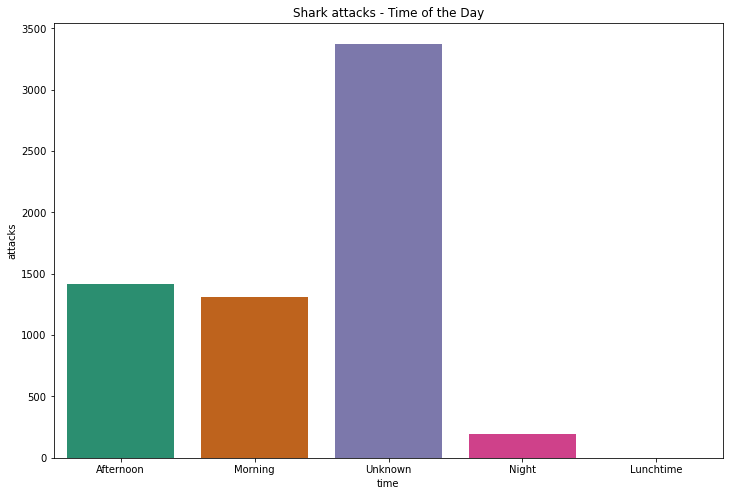

In [126]:
df2['time'].value_counts()
df2.drop(df[df['time'] == '0'].index, inplace = True)
df2['time'].value_counts(dropna=False)
%matplotlib inline
plt.figure(figsize=[12,8])
graph_sessions = sns.countplot(x='time', data=df2, palette='Dark2')
plt.xlabel('time')
plt.ylabel ('attacks')
plt.title('Shark attacks - Time of the Day')

Como podemos observar, el número de ataques que se produce por la tarde, es ligeramente superior a los de por la mañana.

Los ataques de tiburones nocturnos no son espeacialmente numerosos.

Text(0.5, 1.0, 'Shark attacks - Fatal')

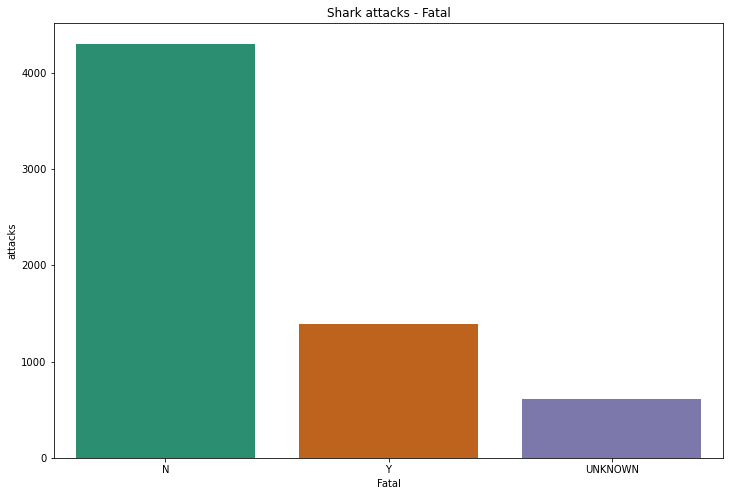

In [136]:
df2['fatal (y/n)'].value_counts()
df2.drop(df[df['fatal (y/n)'] == '0'].index, inplace = True)
df2['fatal (y/n)'].value_counts(dropna=False)
%matplotlib inline
plt.figure(figsize=[12,8])
graph_sessions = sns.countplot(x='fatal (y/n)', data=df2, palette='Dark2')
plt.xlabel('Fatal')
plt.ylabel ('attacks')
plt.title('Shark attacks - Fatal')

In [ ]:
El gráfico nos muestra que, afortunadamente, los ataques que se producen de tiburones a seres humanos son en su mayoría no letales